<a href="https://colab.research.google.com/github/Somcodo4/rul-prediction-of-lithium-ion-batteries/blob/main/GRADIENT_BOOST_PREDICTION%20model%20for%20LION%20batteries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
"""
PREDICTION OF RUL OF LITHIUM
USING BATTERY GRADIENT BOOST
"""

# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import time


In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Load dataset from CSV file
df=pd.read_csv('Battery_RUL II.csv')

In [24]:
# Split features (X) and target variable (y)
X = df.drop(columns=['RUL'])
y = df['RUL']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Gradient Boosting model
gradient_boost_model = GradientBoostingRegressor(random_state=42)
gradient_boost_model.fit(X_train, y_train)

# Make predictions
gradient_boost_preds = gradient_boost_model.predict(X_test)


In [25]:
# Training time calculation
start_time = time.time()
gradient_boost_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Prediction time calculation
start_time = time.time()
gradient_boost_preds = gradient_boost_model.predict(X_test)
prediction_time = time.time() - start_time

In [26]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, gradient_boost_preds)
mae = mean_absolute_error(y_test, gradient_boost_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, gradient_boost_preds)

In [27]:
# Print evaluation metrics
print("Evaluation Metrics for Gradient Boosting Regression:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"Training Time: {training_time} seconds")
print(f"Prediction Time: {prediction_time} seconds")

Evaluation Metrics for Gradient Boosting Regression:
MSE: 57.314223312041676
MAE: 4.98120501733968
RMSE: 7.570615781562401
R2: 0.999446697059075
Training Time: 3.130636692047119 seconds
Prediction Time: 0.009101152420043945 seconds


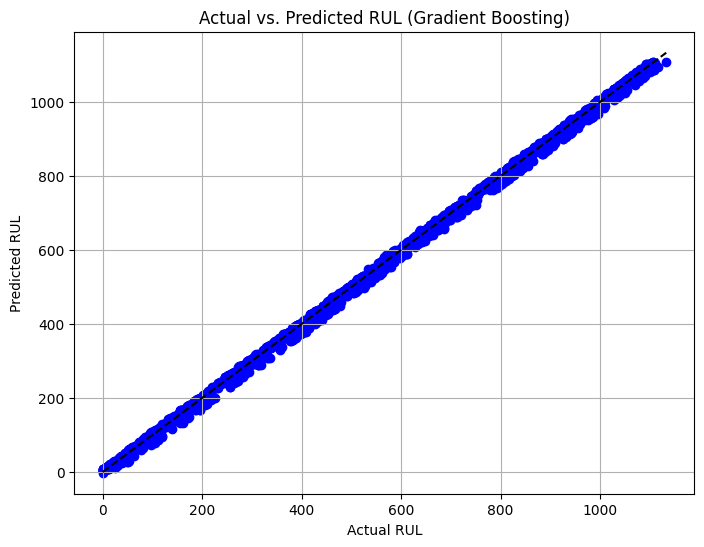

In [28]:
# Plot actual vs. predicted RUL
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gradient_boost_preds, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs. Predicted RUL (Gradient Boosting)')
plt.grid(True)
plt.show()

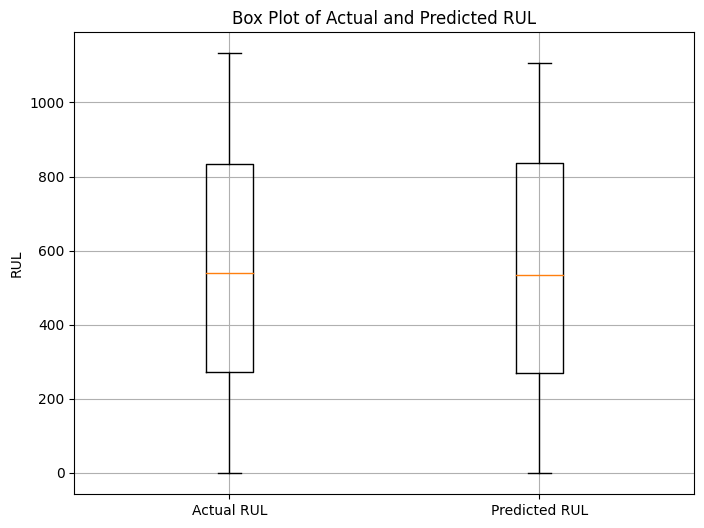

In [29]:
# Plot Boxplot distribution of actual and predicted RUL
plt.figure(figsize=(8, 6))
plt.boxplot([y_test, gradient_boost_preds], labels=['Actual RUL', 'Predicted RUL'])
plt.ylabel('RUL')
plt.title('Box Plot of Actual and Predicted RUL')
plt.grid(True)
plt.show()

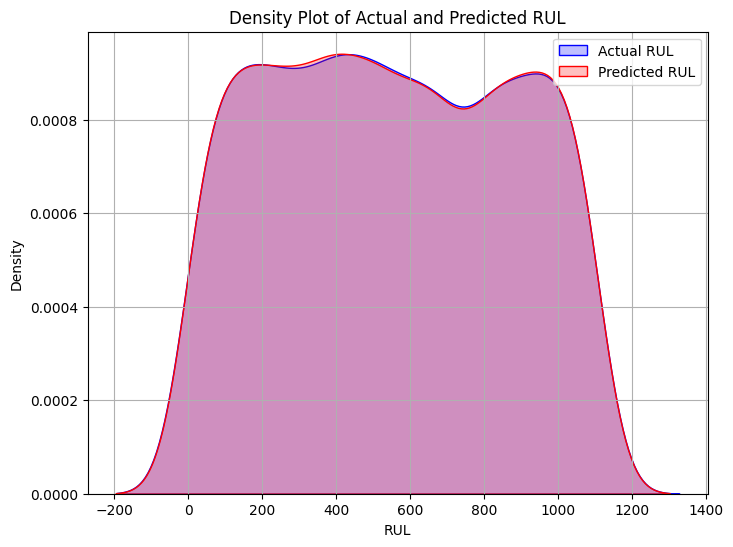

In [30]:
# Plot Densityplot distribution of actual and predicted RUL
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Actual RUL', shade=True, color='Blue')
sns.kdeplot(gradient_boost_preds, label='Predicted RUL', shade=True, color='Red')
plt.xlabel('RUL')
plt.title('Density Plot of Actual and Predicted RUL')
plt.legend()
plt.grid(True)
plt.show()

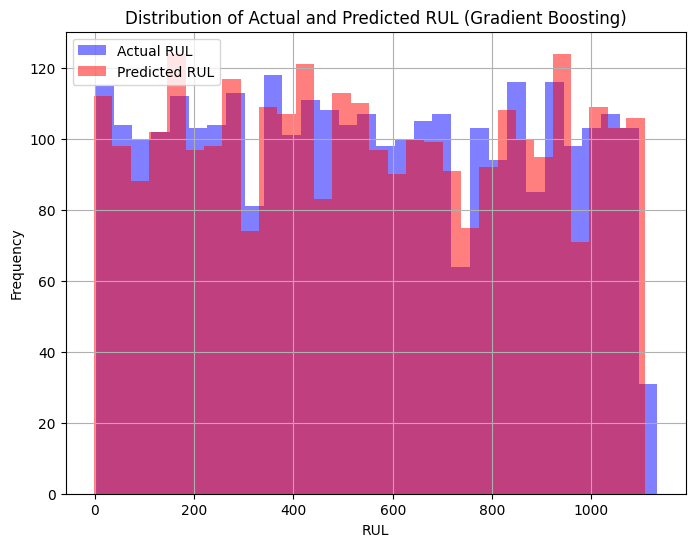

In [31]:
# Plot distribution of actual and predicted RUL
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=30, alpha=0.5, color='blue', label='Actual RUL')
plt.hist(gradient_boost_preds, bins=30, alpha=0.5, color='red', label='Predicted RUL')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted RUL (Gradient Boosting)')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Print evaluation metrics for training data
print("Evaluation Metrics for Gradient Boosting Regression:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"Training Time: {training_time} seconds")
print(f"Prediction Time: {prediction_time} seconds")

Evaluation Metrics for Gradient Boosting Regression:
MSE: 57.314223312041676
MAE: 4.98120501733968
RMSE: 7.570615781562401
R2: 0.999446697059075
Training Time: 3.130636692047119 seconds
Prediction Time: 0.009101152420043945 seconds


In [33]:
# Print evaluation metrics for testing data
print("Evaluation Metrics for Gradient Boosting Regression:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"Training Time: {training_time} seconds")
print(f"Prediction Time: {prediction_time} seconds")

Evaluation Metrics for Gradient Boosting Regression:
MSE: 57.314223312041676
MAE: 4.98120501733968
RMSE: 7.570615781562401
R2: 0.999446697059075
Training Time: 3.130636692047119 seconds
Prediction Time: 0.009101152420043945 seconds


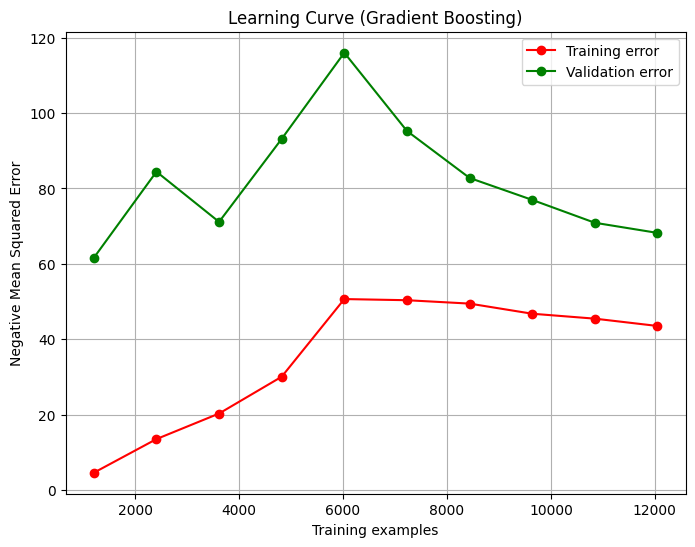

In [34]:
# Define function to plot learning curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='neg_mean_squared_error', cv=5)
    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation error')
    plt.xlabel('Training examples')
    plt.ylabel('Negative Mean Squared Error')
    plt.title('Learning Curve (Gradient Boosting)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot learning curve for Gradient Boosting
plot_learning_curve(gradient_boost_model, X, y)

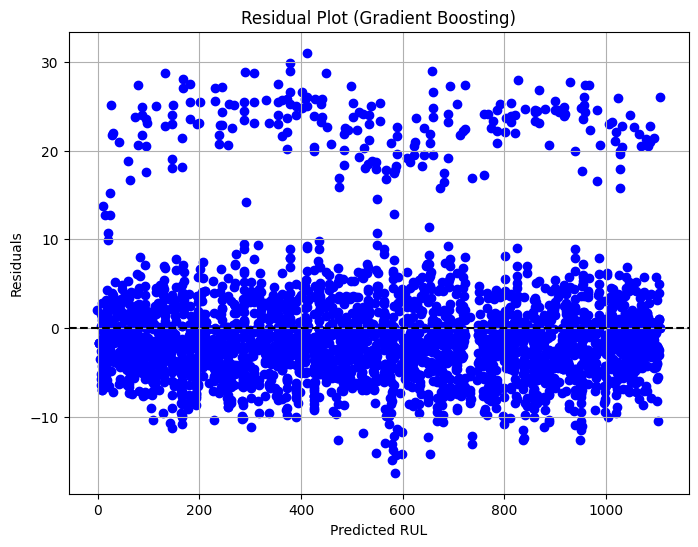

In [35]:
# Calculate residuals
residuals = y_test - gradient_boost_preds

# Plot residual plot
plt.figure(figsize=(8, 6))
plt.scatter(gradient_boost_preds, residuals, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted RUL')
plt.ylabel('Residuals')
plt.title('Residual Plot (Gradient Boosting)')
plt.grid(True)
plt.show()

In [36]:
def get_user_input():
  Cycle_Index = float(input("Enter Cycle_Index: "))
  Discharge_Time  = float(input("Enter Discharge Time: "))
  Decrement =float(input("Enter Decrement 3.6-3.4V: "))
  Max_Voltage_Discharge =float(input("Enter Max. Voltage Dischar. (V)"))
  Min_Voltage_Charge =float(input("Enter Min. Voltage Charg. (V): "))
  Time =float(input("Enter Time at 4.15V (s): "))
  Time_constant_current=float(input("Enter Time constant current (s): "))
  Charging_time =float(input("Enter Charging time (s)"))
  return [Cycle_Index, Discharge_Time, Decrement, Max_Voltage_Discharge , Min_Voltage_Charge, Time, Time_constant_current, Charging_time]

def predict_rul(user_features, gradient_boost_model):
  #convert user input into a numpy array for prediction
  user_features_array=np.array([user_features])
  #Predict RUL using the trained model
  predicted_rul=gradient_boost_model.predict(user_features_array)[0]
  return predicted_rul

#Get user input for features
user_features = get_user_input()

#Predict RUL based on user input
predicted_rul=predict_rul(user_features, gradient_boost_model)

print("\nThe Predicted Remaining Useful Life (RUL:) of your battery is", predicted_rul)
print("This estimate is a rough approximation and actual RUL can vary based on various factors including usage patterns, temperature, and charging habits.")

Enter Cycle_Index: 1
Enter Discharge Time: 2
Enter Decrement 3.6-3.4V: 3
Enter Max. Voltage Dischar. (V)4
Enter Min. Voltage Charg. (V): 5
Enter Time at 4.15V (s): 6
Enter Time constant current (s): 7
Enter Charging time (s)8

The Predicted Remaining Useful Life (RUL:) of your battery is 1100.8393400157918
This estimate is a rough approximation and actual RUL can vary based on various factors including usage patterns, temperature, and charging habits.
